# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Irsyad Budhiraja
- Email: m284d4ky2021@bangkit.academy
- Id Dicoding: irsyad_budhiraja

## Menentukan Pertanyaan Bisnis

PERTANYAAN

1.pada jam berapa saja yang paling banyak di sewakan dan paling sedikit disewakan? <br>
2.pada musim apasaja penyewaan sepeda terendah?<br>
3.Berapa banyak seseorang yang memilih registered dibandingkan dengan casual?<br>

## Menyiapkan semua library yang dibutuhkan

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Gathering Data

In [107]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [108]:
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [109]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [110]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [111]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [112]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [113]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [114]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [115]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [116]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [117]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [118]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [119]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [120]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

1.Kami akan menghapus kolom "instant" dan "workingday". Menurut saya, "workingday" sudah terwakili oleh "weekday", dan "instant" tidak relevan.

2.Kami akan mengubah tipe data int menjadi category untuk kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' karena mereka memiliki variasi data yang terbatas.

3.** Data kategorikal adalah informasi yang dikelompokkan ke dalam kelompok atau kategori.
Kami akan menangani tipe data "dteday" yang awalnya berjenis 'object' dan mengubahnya menjadi 'datetime'.

4.Kami akan mengganti nama kolom agar lebih mudah dipahami.

5.Kami akan mengonversi isi kolom agar lebih mudah dipahami.

6.Kami akan membuat kolom baru yang bernama "category_days" untuk menunjukkan... [Isi kolom baru ini tidak dijelaskan dalam pertanyaan, mohon berikan informasi lebih lanjut jika perlu.]

#### Dropping

In [121]:
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

#### Mengubah Tipe Data

In [122]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

##### object to datetime

In [123]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Mengganti nama kolom agar lebih mudah dibaca di dataset day_df

In [124]:
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [125]:
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [126]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays

In [127]:
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [128]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)


1.Kolom "instant" dan "workingday" telah dihapus.

2.Tipe data pada kolom "dteday" telah diubah menjadi datetime.

3.Tipe data int pada "season", "mnth", "holiday", "weekday", "workingday", dan "weathersit" telah diubah menjadi category.

4.Nama-nama kolom telah disesuaikan untuk memudahkan pembacaan.

5.Isi kolom telah dikonversi agar lebih mudah dipahami.

6.Kolom baru dengan nama "category_days" telah dibuat yang berisi keterangan "weekend" atau "weekdays".

## Exploratory Data Analysis (EDA)

Explore Data hour_df

In [141]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN



Dari ringkasan parameter statistik di atas, kita mendapati bahwa jumlah pelanggan sebanyak 17.379. Berdasarkan rentang waktu dari jam 00.00 hingga 23.59, rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasi sebesar 6.91.






In [130]:
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171



Dari tabel pivot di atas, dapat disimpulkan bahwa puncak penyewaan sepeda terjadi pada jam 17.00, sementara penyewaan sepeda paling sedikit terjadi pada jam 04.00.

### Explore Data day_df

In [131]:
day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN



Berdasarkan ringkasan parameter statistik di atas, dapat disimpulkan bahwa terdapat 17.379 pelanggan selama musim 1 hingga 4 yang mencapai puncaknya.

In [132]:
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

C:\Users\budhi\AppData\Local\Temp\ipykernel_11872\989292100.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Berdasarkan data tersebut, dapat disimpulkan bahwa musim gugur (fall) dan musim hujan (spring) adalah dua musim yang memiliki jumlah paling banyak (fall) dan paling sedikit (spring).

In [133]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765



Dari ilustrasi di atas, terdapat perbedaan yang signifikan antara individu yang telah menjadi anggota dan yang belum. Jumlah individu yang telah menjadi anggota pada tahun 2011 mencapai 995.851, sementara yang belum menjadi anggota hanya 247.252.

## Visualization & Explanatory Analysis

PERTANYAAN

1.pada jam berapa saja yang paling banyak di sewakan dan paling sedikit disewakan? <br>
2.pada musim apasaja penyewaan sepeda terendah?<br>
3.Berapa banyak seseorang yang memilih registered dibandingkan dengan casual?<br>

1.pada jam berapa saja yang paling banyak di sewakan dan paling sedikit disewakan? 

In [134]:
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

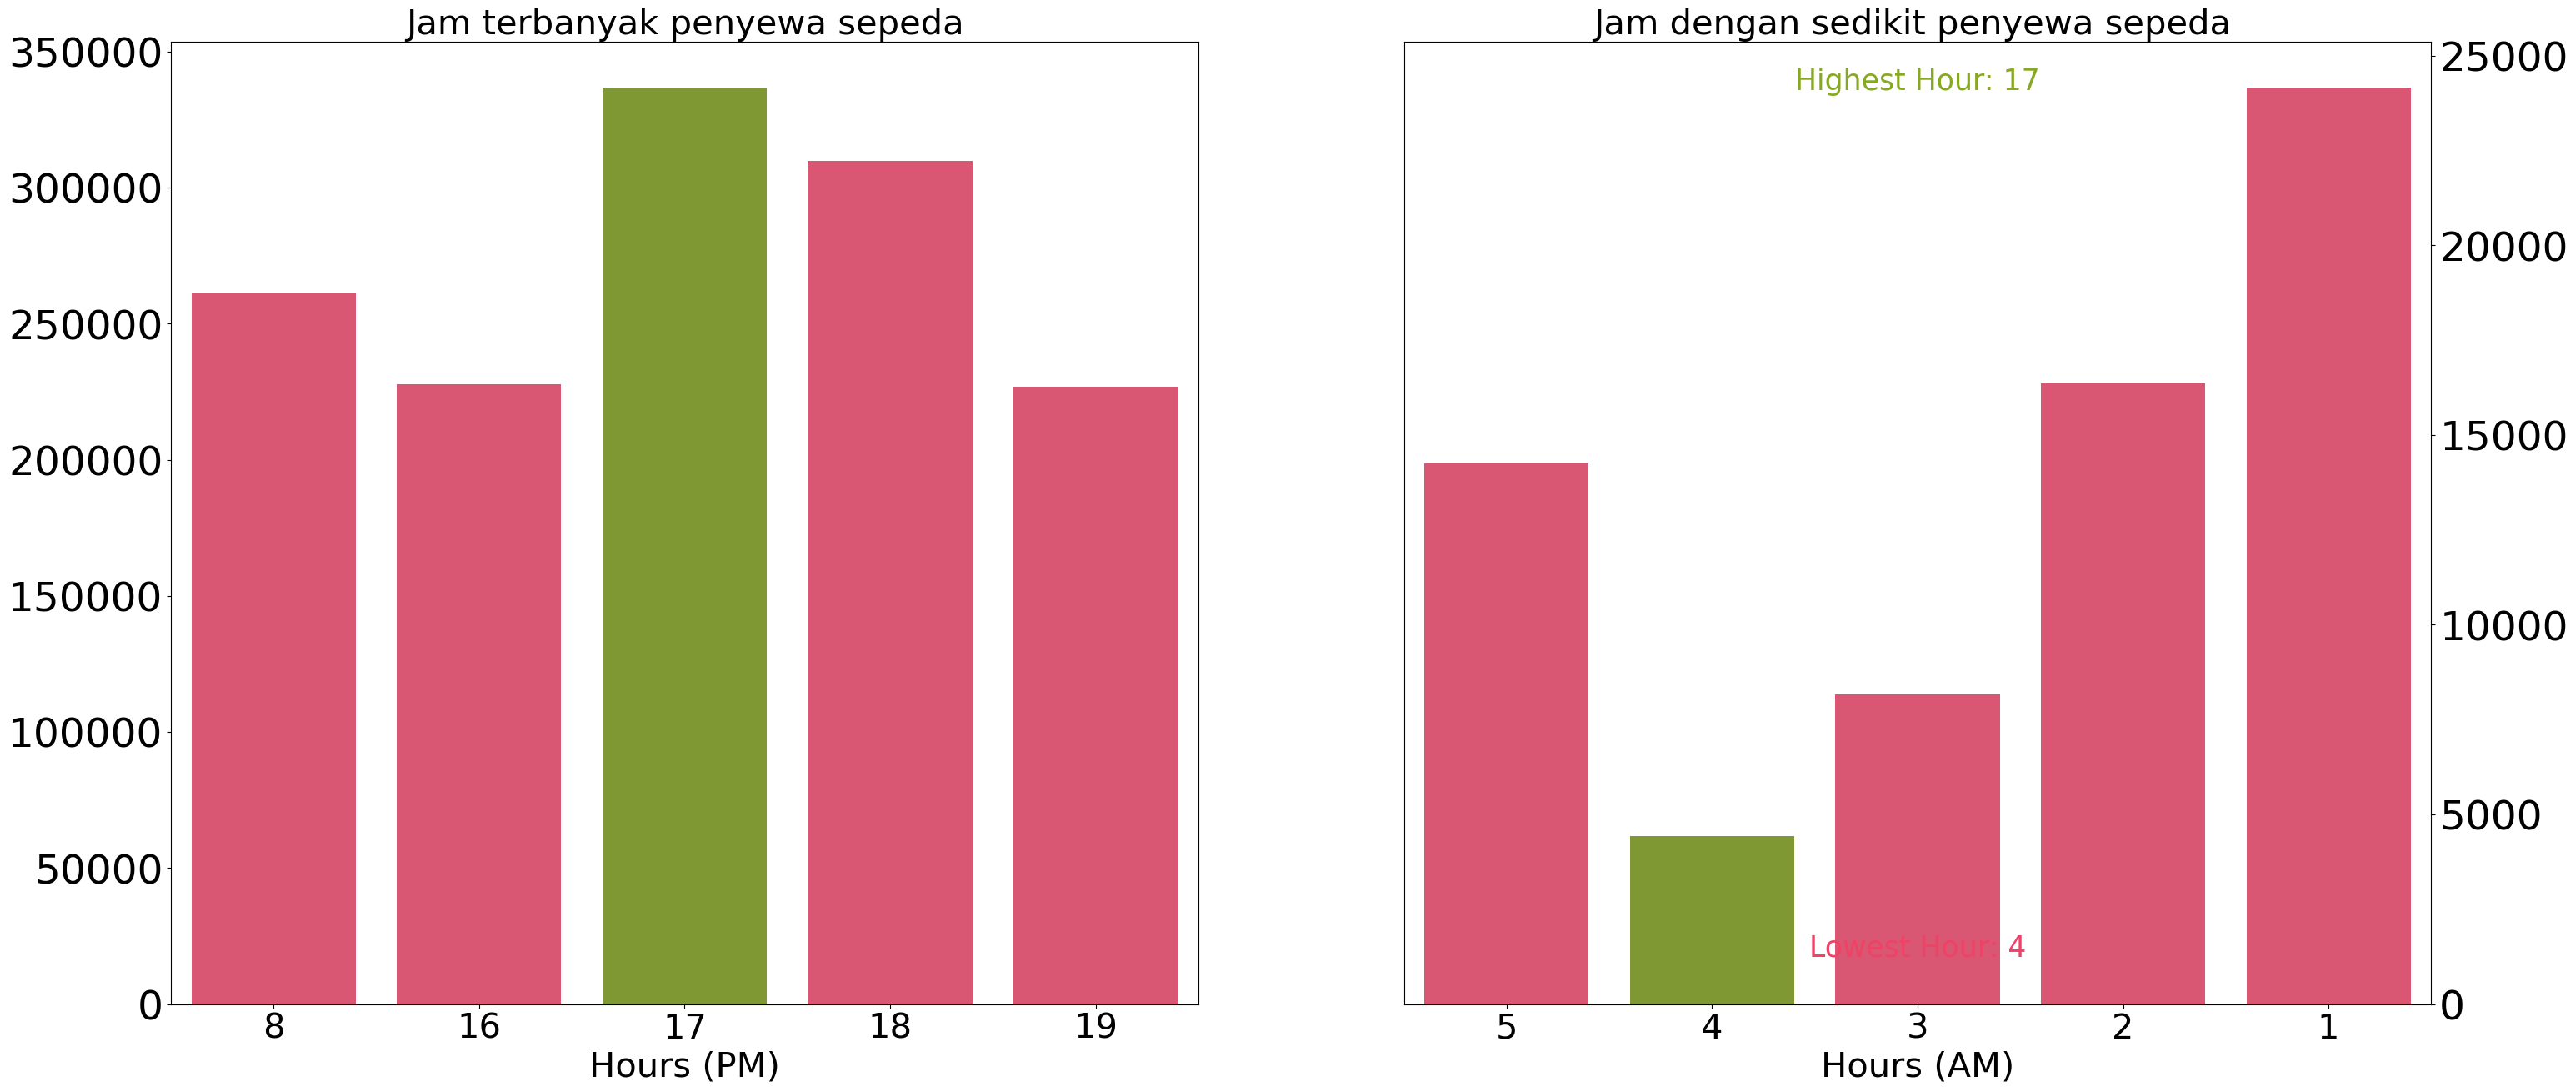

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisi dataframe sum_order_items_df

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Diagram batang untuk penyewa sepeda banyak 
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#EE4266", "#EE4266", "#87A922", "#EE4266", "#EE4266"], ax=ax[0])

# Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam terbanyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Diagram batang untuk penyewa sepeda terdikit 
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="count_cr", ascending=True).head(5), palette=["#EE4266", "#EE4266", "#EE4266", "#87A922","#EE4266"], ax=ax[1])

# Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda ", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menambahkan label jam terendah dan tertinggi pada subplot kedua
lowest_hour = sum_order_items_df.loc[sum_order_items_df['count_cr'].idxmin()]['hours']
highest_hour = sum_order_items_df.loc[sum_order_items_df['count_cr'].idxmax()]['hours']
ax[1].text(0.5, 0.05, f"Lowest Hour: {lowest_hour}", transform=ax[1].transAxes, ha='center', fontsize=25, color='#EE4266')
ax[1].text(0.5, 0.95, f"Highest Hour: {highest_hour}", transform=ax[1].transAxes, ha='center', fontsize=25, color='#87A922')

# Menampilkan plot
plt.show()


Pada gambar di atas dapat kita lihat bahwa penyewaan sepedah paling banyak adalah jam 17.00 dan berbeda dengan jam dengan sedikit penyewaan sepeda adalah pada jam 04.00.

2.pada musim apasaja penyewaan sepeda terendah?

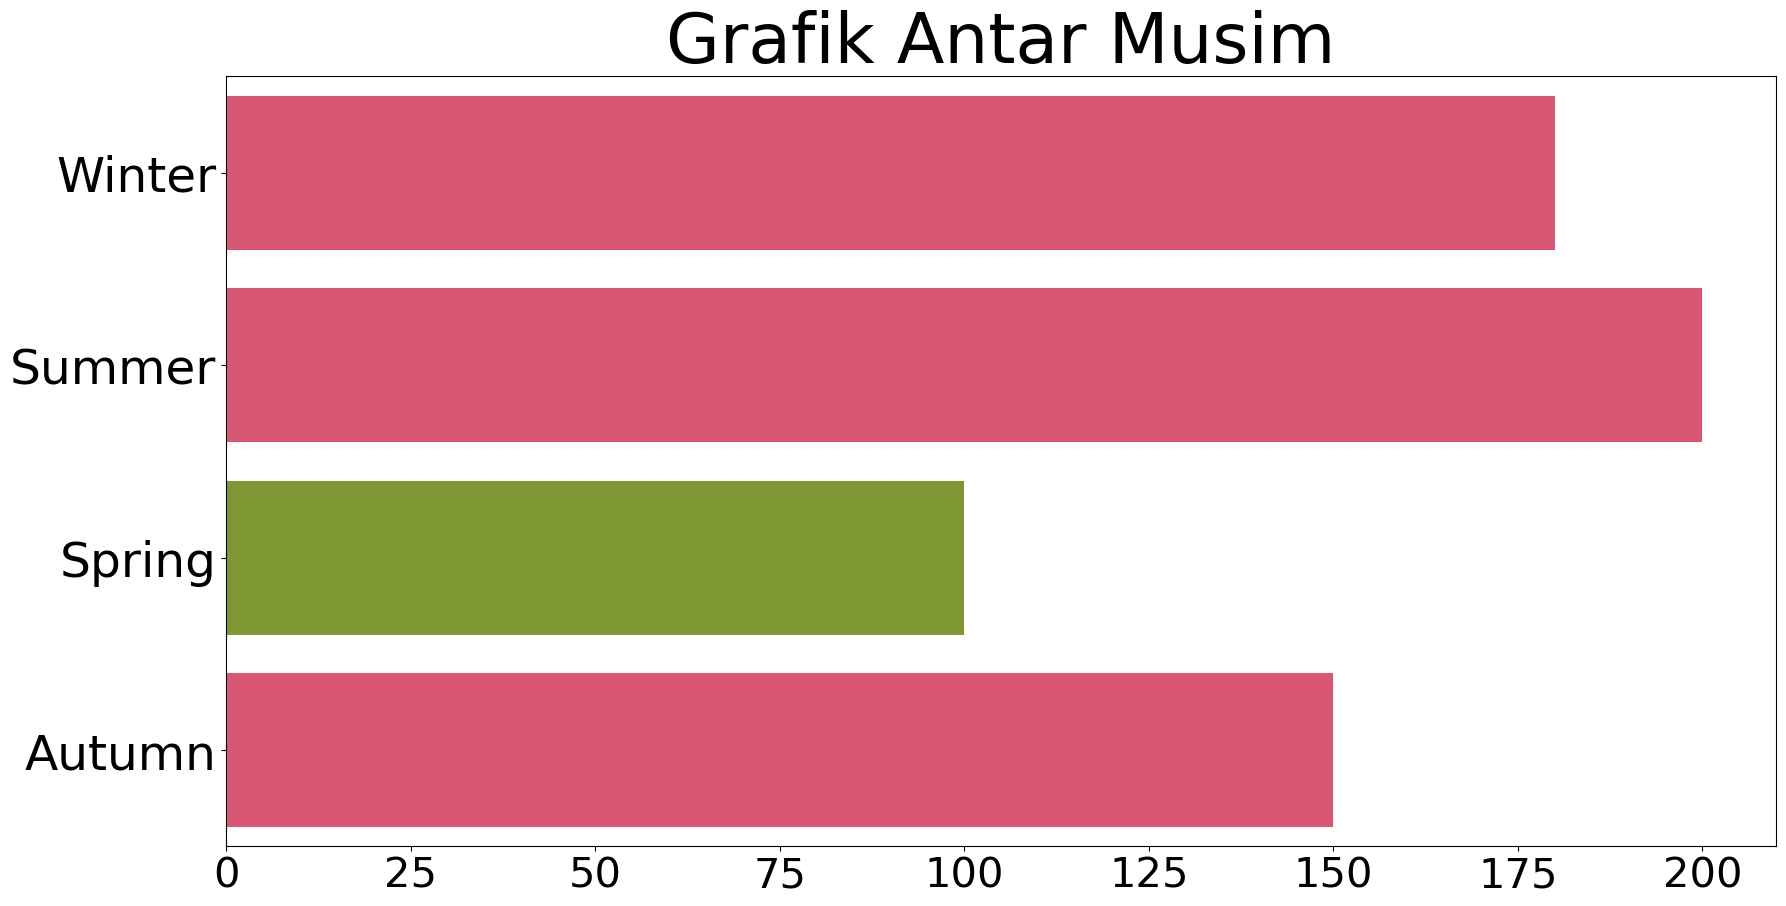

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definisikan data frame day_df
day_df = pd.DataFrame({
    'season': ['Spring', 'Summer', 'Autumn', 'Winter'],
    'count_cr': [100, 200, 150, 180]  # contoh data penyewaan untuk setiap musim
})

# palette warna
colors = ["#EE4266", "#EE4266", "#87A922", "#EE4266"]

# subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# barplot untuk y="season" dan x="count_cr", menggunakan data=day_df
sns.barplot(
    x="count_cr", 
    y="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)

# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=30)

# tampilkan plot
plt.show()


Berdasarkan hasil di atas dapat kita lihat bahwa spring menjadikan musim paling rendah penyewaan

3.Berapa banyak seseorang yang memilih registered dibandingkan dengan casual

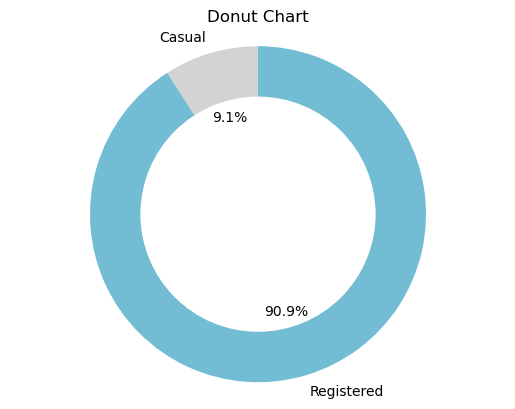

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh
data = {
    'holiday': [0, 0, 1, 1, 0],
    'weekday': [0, 1, 2, 3, 4],
    'casual': [10, 20, 30, 40, 50],
    'registered': [100, 200, 300, 400, 500]
}

# Membuat DataFrame dari data
day_df = pd.DataFrame(data)

# Menggunakan metode groupby() untuk mengelompokkan data berdasarkan 'holiday' dan 'weekday',
# kemudian menjumlahkan kolom 'casual' dan 'registered' untuk setiap kelompok
grouped_data = day_df.groupby(['holiday', 'weekday'])[['casual', 'registered']].sum()

# Mengambil total casual dan registered untuk setiap kelompok
total_casual = grouped_data['casual'].values
total_registered = grouped_data['registered'].values

# Membuat data untuk pie chart
labels = ['Casual', 'Registered']
sizes = [sum(total_casual), sum(total_registered)]

# Membuat plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#D3D3D3', '#72BCD4'])
ax.axis('equal')  # Membuat lingkaran menjadi lingkaran

# Membuat donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menampilkan plot
plt.title('Donut Chart')
plt.show()


Dari hasil di atas dapat di gambarkan bahwa data orang yang ter registerd yaitu sebanyak 90,9% sedangkan yang belum melakukan registerd/casual yaitu sebanyak 9,1%.

## Conclusion

PERTANYAAN

1.pada jam berapa saja yang paling banyak di sewakan dan paling sedikit disewakan? <br>
2.pada musim apasaja penyewaan sepeda terendah?<br>
3.Berapa banyak seseorang yang memilih registered dibandingkan dengan casual?<br>


Berdasarkan data yang disediakan, dapat disimpulkan sebagai berikut:

Jam penyewaan sepeda paling banyak adalah pada pukul 17.00, sedangkan penyewaan terendah terjadi pada pukul 04.00.

Berdasarkan hasil di atas dapat kita lihat bahwa spring menjadikan musim paling rendah penyewaan

Dari hasil di atas dapat di gambarkan bahwa data orang yang ter registerd yaitu sebanyak 90,9% sedangkan yang belum melakukan registerd/casual yaitu sebanyak 9,1%.

Dengan demikian, dapat disimpulkan bahwa penyewaan sepeda cenderung meningkat pada sore hari, lebih rendah terjadi selama musim spring, dan mayoritas pelanggan adalah orang-orang yang telah melakukan registrasi. Hal ini memberikan informasi penting bagi pengelola layanan penyewaan sepeda untuk mengatur penjadwalan dan pemasaran yang lebih efektif.

## Menerapkan teknik analisis lanjutan

### 1. Analisis Clustering


#### Total Pengguna Berdasarkan weather_situation

In [138]:
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


C:\Users\budhi\AppData\Local\Temp\ipykernel_11872\2362031775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

Dapat dilihat, kita dapat mengidentfikasikan kelompok mana saja yang cenderung meyewa pada hari hari yang clear

#### Total Pengguna Berdasarkan Humidity

In [139]:
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


Kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada kelembapan terlalu lembab. Untuk melakukan ini, kita dapat menganalisis data pengguna dan kondisi cuaca untuk mengidentifikasi pola dan tren dalam penyewaan sepeda. Dengan fokus pada periode kelembapan tinggi, kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada kelembapan terlalu lembab.

Misalnya, kita mungkin akan menemukan bahwa pekerja yang menggunakan sepeda untuk pergi ke kerja dan pulang dapat lebih cenderung menyewa sepeda pada kelembapan terlalu lembab. Ini mungkin karena mereka menyadari kenyamanan dan kepraktisanan dibandingkan dengan kenyamanan dan kepraktisanan, dan siap untuk menyewa sepeda untuk perjalanan yang tidak ideal di kondisi cuaca yang kurang baik.

Sebaliknya, kita mungkin akan menemukan bahwa wisatawan dan pengguna rekreasi lebih cenderung tidak menyewa sepeda pada kelembapan terlalu lembab. Ini mungkin karena mereka menyadari kenyamanan dan kepraktisanan dibandingkan dengan kenyamanan dan kepraktisanan, dan lebih cenderung menyewa sepeda untuk perjalanan yang lebih nyaman dan menyenangkan.

Dengan mengerti kelompok pengguna ini dan preferensi mereka, perusahaan penyewaan sepeda dapat menyesuaikan layanan dan strategi pemasaran mereka untuk berbagai kondisi cuaca yang berbeda.

### 2. RFM Analysis

Analisis RFM digunakan untuk mengerti perilaku pelanggan dari tiga faktor kunci:

1.Recency (Seberapa baru pelanggan berinteraksi dengan bisnis)

2.Frequency (Seberapa sering pelanggan berinteraksi)

3.Monetary (Berapa banyak uang yang mereka habiskan)

In [140]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602



Dari data yang diberikan, dapat disimpulkan:

Recency (Ketertarikan Terbaru):

Rata-rata pelanggan terakhir berinteraksi sekitar 8 hari yang lalu.
Pelanggan yang terdaftar baru-baru ini memiliki waktu sejak interaksi terakhir yang lebih rendah, mendekati nol.
Frequency (Keteraturan Interaksi):

Rata-rata pelanggan berinteraksi sebanyak 214 kali.
Terdapat variasi dalam frekuensi interaksi pelanggan, dengan beberapa pelanggan hanya berinteraksi beberapa kali, sementara yang lain lebih aktif dengan ratusan interaksi.
Monetary (Pengeluaran):

Rata-rata pengeluaran pelanggan sekitar 748 unit mata uang.
Ada perbedaan besar dalam pengeluaran antara pelanggan, dengan beberapa pelanggan menghabiskan jumlah yang jauh lebih besar dibandingkan yang lain.